In [35]:
import pandas as pd
import seaborn as sns

In [16]:
data = pd.read_csv("../data/default of credit card clients.csv", header = 1)

In [17]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
# maybe change pay_0 to pay_1
# one hot encoding of sex 
# education: 0,4,5,6 should be combined into a single category
# marriage: has value 0 which is coded as other, while 1,2,3 are married, single, and divorced.
# we need to split "PAY_X" values apart: -2,1,0 are categorical, the month delays are integer values (and comparable)

data.rename(columns={"PAY_0" : "PAY_1"}, inplace = True)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Information about the data

<Axes: xlabel='default payment next month', ylabel='count'>

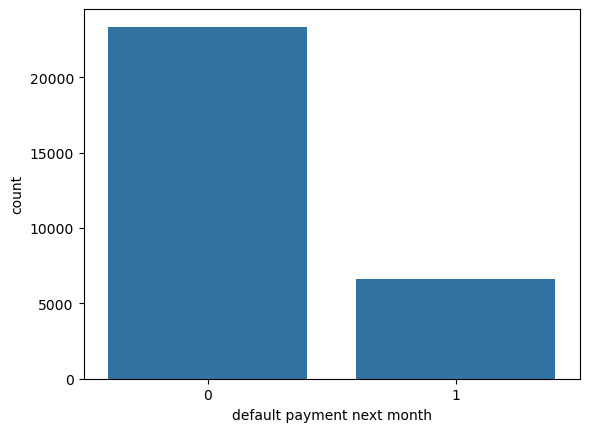

In [56]:
sns.barplot(data= data["default payment next month"].value_counts())

<Axes: xlabel='SEX', ylabel='count'>

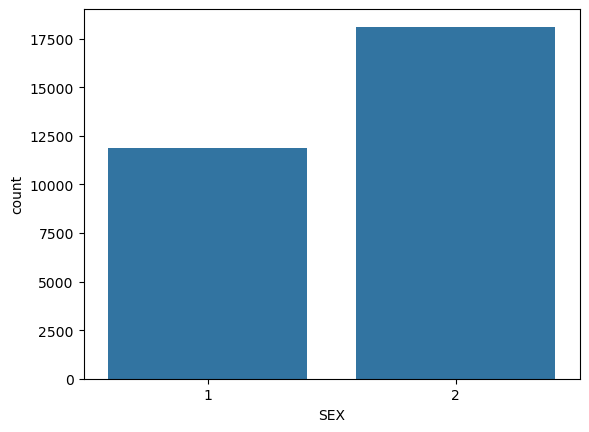

In [68]:
sns.barplot(data= data["SEX"].value_counts())

<Axes: xlabel='EDUCATION', ylabel='count'>

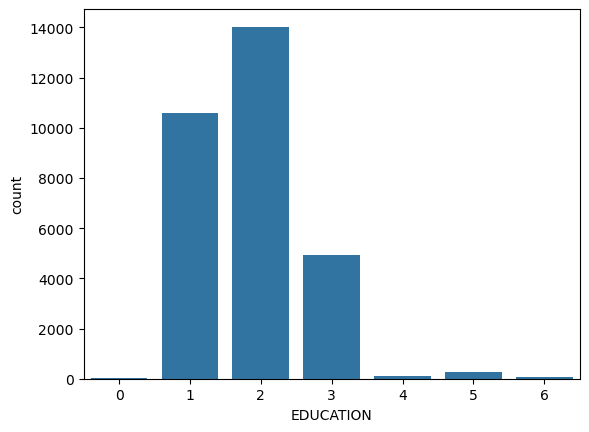

In [69]:
sns.barplot(data= data["EDUCATION"].value_counts())

The documentation for the education data only defines what the values 1 through 4 are coded as. Additionally, there are not a lot of rows for value 4, so it may be prudent to remove these data points from the data set. 

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

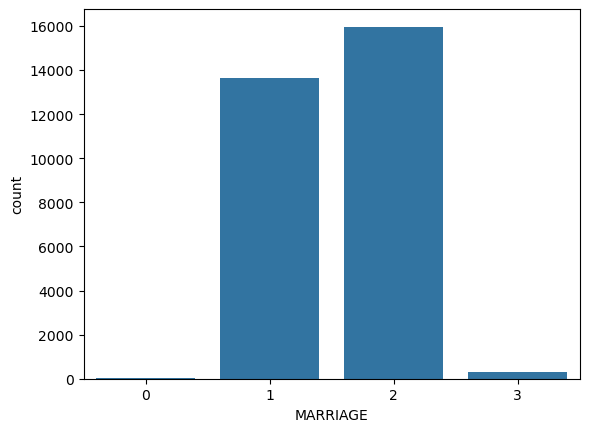

In [73]:
sns.barplot(data= data["MARRIAGE"].value_counts())
data["MARRIAGE"].value_counts()

## Checking Entries 
Here we check some of the data entries to make sure they make sense. For example, the ages of credit card clients should be between 18 and 100.

In [31]:
print("all ages are less than 100: ",(data["AGE"]<100).all())
print("all ages are greater than 17: ", (data["AGE"]>17).all())

all ages are less than 100:  True
all ages are greater than 17:  True


The documentation for the 'Pay_X' entries states that this is the number of months since an on-time payment. For example, a value of 1 means that the client is made an on-time payment for 1 consecutive month. The value -1 is used to code on-time payments, and 0, -2 lack any documentation. The documentation suggests that the correct range of values is -1 to 9, while the data contains -2 and 8 as minimum and maximum values. 

In [67]:
print("maximum entry in 'PAY_X' is: ", data[["PAY_{}".format(i) for i in range(1,7)]].values.max()) 
print("minimum entry in 'PAY_X' is: ", data[["PAY_{}".format(i) for i in range(1,7)]].values.min()) 

maximum entry in 'PAY_X' is:  8
minimum entry in 'PAY_X' is:  -2


8